In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
Uber_df = pd.read_csv("My Uber Drives - 2016.csv")

#To see the first 5 rows:
Uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
#To get the shape (records*features):
Uber_df.shape

(1156, 7)

In [6]:
#To find the features:
Uber_df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [7]:
#To find the type of data:
Uber_df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [22]:
Uber_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,1155.0,21.125108,359.454497,0.5,2.9,6.0,10.4,12204.7


In [8]:
#To find number of unregistered data:
Uber_df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [9]:
#Checking if theres a duplicated row (Record):
Uber_df.duplicated().sum()

1

In [10]:
#Removing the duplicated row (Record):
Uber_df.drop_duplicates(inplace=True)
Uber_df.duplicated().sum()

0

[Text(0.5, 1.0, 'MILES outliers')]

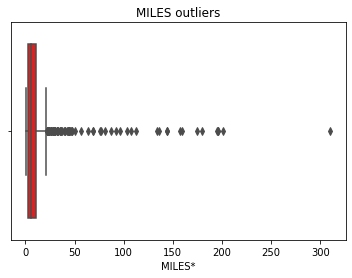

In [73]:
#Checking for outliesrs in miles:
sns.boxplot(x='MILES*', data=Uber_df, color='red').set(title='MILES outliers') 

In [75]:
#There is some weird outlier at more that 300 miles
#To get insightsabout this outlier:
Uber_df[Uber_df['MILES*']==Uber_df['MILES*'].max()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTHS*,YEARS*,DAYS*
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit,3,25,NaN


Visualization:

Business    1077
Personal      77
Name: CATEGORY*, dtype: int64


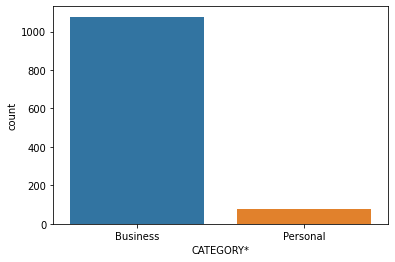

In [11]:
sns.countplot(data = Uber_df , x = 'CATEGORY*')
print(Uber_df['CATEGORY*'].value_counts())
#Conclusions : most of the rides are business rides

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64


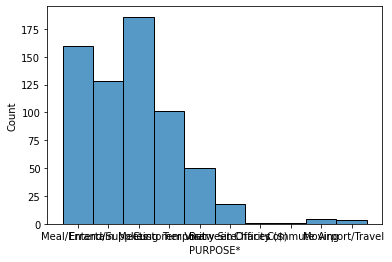

In [18]:
sns.histplot(data = Uber_df,x='PURPOSE*')
print(Uber_df['PURPOSE*'].value_counts())
#Conclusions : most of the rides are for Meeting purpose

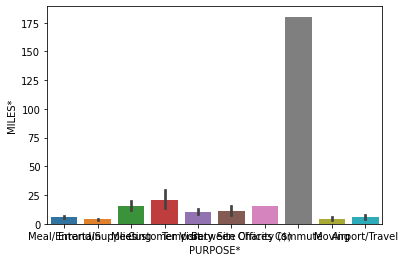

In [19]:
sns.barplot(data = Uber_df , x = 'PURPOSE*' , y = 'MILES*')
#Conclusions : the miles are the most for commute purposes

start locations:
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: START*, dtype: int64
stop locations:
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Name: STOP*, dtype: int64


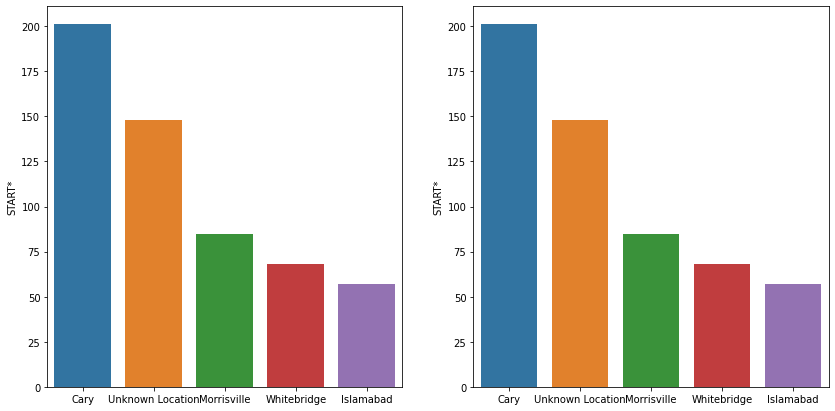

In [35]:
#Getting the top 5 starting and stopping locations:
start_labels = Uber_df['START*'].value_counts().nlargest(5)
print('start locations:')
print(start_labels)

fig,axes=plt.subplots(1,2,figsize=(14,7))

sns.barplot(x=start_labels.index, y=start_labels , ax=axes[0]);

stop_labels = Uber_df['STOP*'].value_counts().nlargest(5)
print('stop locations:')
print(stop_labels)
sns.barplot(x=start_labels.index, y=start_labels , ax=axes[1]);

#Conclusions : most of the starting and stopping locations where in cary

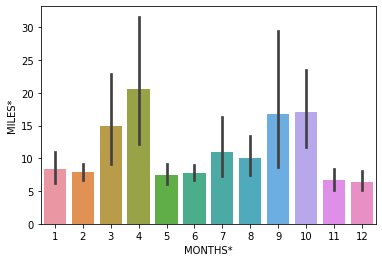

In [51]:
#First we drop the last row (contains only the total of miles)
Uber_df.drop(index=Uber_df.index[-1], axis=0, inplace=True)
#Then we seperate the months in a new column
Uber_df['MONTHS*']=pd.DatetimeIndex(data=Uber_df['START_DATE*']).month

sns.barplot(data = Uber_df , x='MONTHS*' , y='MILES*')

#conclusion the most miles covered where in April(4th month)


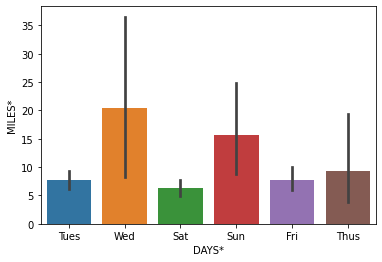

In [72]:
#seperate the days in a new column
Uber_df['DAYS*']=pd.DatetimeIndex(data=Uber_df['START_DATE*']).day

day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
Uber_df['DAYS*'] = Uber_df['DAYS*'].map(day_label)

sns.barplot(data = Uber_df , x='DAYS*' , y='MILES*')

#conclusion the most miles are covered in wednesdays

***Conclusions:***


*   Most of the rides are business rides.
*   Most of the rides are for Meeting purpose.
*   The miles are the most for commute purposes.
*   Most of the starting and stopping locations where in 'cary' location.
*   The most miles covered where in April(4th month).
*   The least miles covered where in December(12th month).
*   The most miles are covered on wednesdays.
*   The least miles are covered on saturdays.





